<a href="https://colab.research.google.com/github/arezyapova/projects/blob/main/Miniproject_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
user_data = pd.read_csv('/home/jupyter-a.rezjapova-13/lesson_3/3_user_data.csv')

In [ ]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [ ]:
logs = pd.read_csv('/home/jupyter-a.rezjapova-13/lesson_3/3_logs.csv')

In [ ]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [ ]:
logs.platform.value_counts()

phone       2753
computer    1505
tablet       242
Name: platform, dtype: int64

In [ ]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [ ]:
client_succ = logs \
    .query('success==True') \
    .groupby('client', as_index=False) \
    .agg({'success':'count'}) \
    .query('success==41') \
    .sort_values('client')

In [ ]:
logs \
    .query('success==True') \
    .groupby('platform', as_index=False) \
    .agg({'success':'count'})

,platform,success
0,computer,1090
1,phone,2019
2,tablet,180


In [ ]:
user_logs = logs.merge(user_data, on = 'client')

In [ ]:
user_logs

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [ ]:
user_logs.query('premium==True') \
        .groupby('platform', as_index=False) \
        .agg({'success':'count'})

,platform,success
0,computer,150
1,phone,246
2,tablet,24


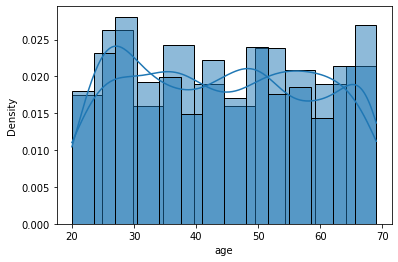

In [ ]:
sns.histplot(user_logs.query('premium==True').age, kde=True, stat = "density") 
sns.histplot(user_logs.query('premium==False').age, kde=True, stat = "density")

In [ ]:
user_logs.head()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


In [ ]:
client_success = user_logs.groupby('client', as_index=False) \
        .agg({'success':'count'})

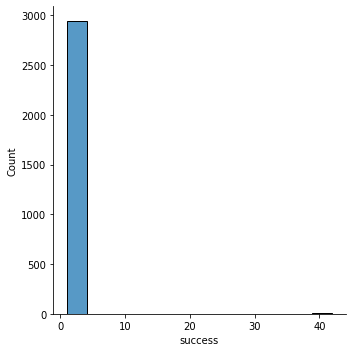

In [ ]:
ax = sns.displot(client_success.success)

In [ ]:
client_success_comp = user_logs.query('platform=="computer"' and 'success==True')

In [ ]:
client_success_comp

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3432,85769,True,computer,1585447052,False,46
3433,81031,True,computer,1585401631,False,45
3435,95152,True,computer,1585420263,False,67
3437,8967,True,phone,1585465121,False,33


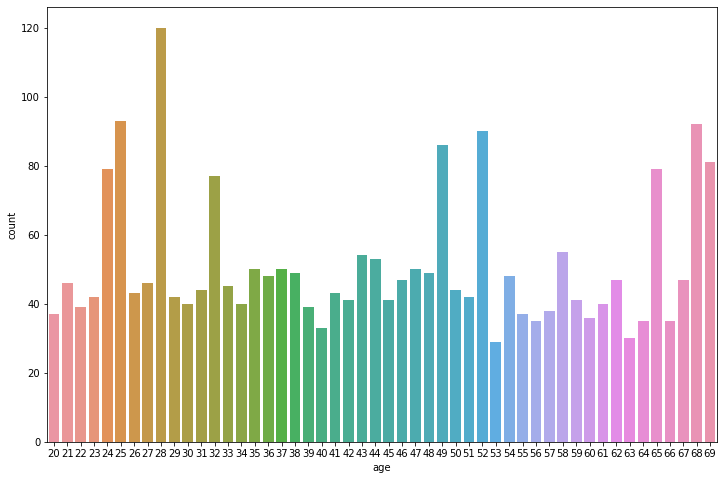

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='age', data = client_success_comp)